In [1]:
#Stage 1: Bayesian (acc = 90%)
# prob = 30%
# 48 records out of 73(ECG + data) is passed to stage 2 : XGBoost , here 25 records discarded by bayesian in which 0 was having CAD
# acc = 93.7% of XGBoost
# 1 FN 

import pandas as pd
import numpy as np
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import recall_score
data = pd.read_csv("F:/ME/Sem 3/demo4.csv") 
print(data)

     Atypical  Age  Sex  Obesity        BMI  DM  FBS  Typical Chest Pain  \
0           0   53    0        1  29.387755   0   90                   0   
1           0   67    1        1  28.398718   0   80                   1   
2           0   54    0        0  20.077335   0   85                   1   
3           0   66    1        1  26.838648   0   78                   0   
4           0   50    1        1  37.165193   0  104                   0   
..        ...  ...  ...      ...        ...  ..  ...                 ...   
298         0   58    0        1  29.761905   0   92                   1   
299         1   55    1        1  27.700831   0   86                   0   
300         0   48    1        1  30.078125   0   83                   0   
301         1   57    1        1  35.599858   1   96                   0   
302         0   56    1        1  29.411765   0   78                   1   

     Weight  Length  Current Smoker  EX-Smoker  DLP   BP   CR  BUN  \
0        90     1

In [2]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.82,random_state=23)

In [4]:
def resamplingDataPrep(X_train, y_train, target_var): 
    # concatenate our training data back together
    resampling = X_train.copy()
    resampling[target_var] = y_train.values
    # separate minority and majority classes
    majority_class = resampling[resampling[target_var]==0]
    minority_class = resampling[resampling[target_var]==1]
    # Get a class count to understand the class imbalance.
    print('majority_class: '+ str(len(majority_class)))
    print('minority_class: '+ str(len(minority_class)))
    return majority_class, minority_class

In [5]:
def upsample_SMOTE(X_train, y_train, ratio=1.0):
    """Upsamples minority class using SMOTE.
    Ratio argument is the percentage of the upsampled minority class in relation
    to the majority class. Default is 1.0
    """
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    print(len(X_train_sm), len(y_train_sm))
    return X_train_sm, y_train_sm

In [6]:
resamplingDataPrep(x_train, y_train, 'Cath')

majority_class: 73
minority_class: 175


(     Atypical  Age  Sex  Obesity        BMI  DM  FBS  Typical Chest Pain  \
 296         1   42    0        0  23.711845   0  202                   0   
 64          0   55    0        1  29.411765   0   90                   0   
 193         1   64    1        1  31.611773   1  300                   0   
 8           0   58    1        1  31.615793   0   69                   0   
 16          0   41    0        0  23.808690   0   65                   0   
 ..        ...  ...  ...      ...        ...  ..  ...                 ...   
 48          0   53    1        1  25.721032   0   84                   0   
 293         1   59    0        1  31.248764   0   90                   0   
 192         1   54    0        0  24.910767   0   94                   0   
 194         1   46    1        1  28.515625   0   94                   0   
 153         1   63    1        1  25.000000   1  156                   0   
 
      Weight  Length  Current Smoker  EX-Smoker  DLP   BP   CR  BUN  \
 29

In [7]:
xx, yy = upsample_SMOTE(x_train,y_train)

350 350


In [8]:
print(xx)
print(yy)
print(type(xx))
print(type(yy))

     Atypical  Age  Sex  Obesity        BMI  DM  FBS  Typical Chest Pain  \
0           1   62    0        1  32.283058   0   90                   0   
1           0   56    1        0  21.093750   0   97                   1   
2           0   65    1        1  32.000000   1  227                   1   
3           1   42    0        0  23.711845   0  202                   0   
4           0   55    0        1  29.411765   0   90                   0   
..        ...  ...  ...      ...        ...  ..  ...                 ...   
345         0   64    0        1  31.227103   0   92                   0   
346         0   55    0        0  24.864239   0   78                   0   
347         0   50    0        0  25.135547   0   88                   0   
348         1   48    1        0  26.354425   0   94                   0   
349         0   41    0        0  32.452126   0   90                   0   

     Weight  Length  Current Smoker  EX-Smoker  DLP   BP        CR  BUN  \
0       100 

In [9]:
df_col = pd.concat([xx,yy], axis=1)

In [10]:
print(df_col)

     Atypical  Age  Sex  Obesity        BMI  DM  FBS  Typical Chest Pain  \
0           1   62    0        1  32.283058   0   90                   0   
1           0   56    1        0  21.093750   0   97                   1   
2           0   65    1        1  32.000000   1  227                   1   
3           1   42    0        0  23.711845   0  202                   0   
4           0   55    0        1  29.411765   0   90                   0   
..        ...  ...  ...      ...        ...  ..  ...                 ...   
345         0   64    0        1  31.227103   0   92                   0   
346         0   55    0        0  24.864239   0   78                   0   
347         0   50    0        0  25.135547   0   88                   0   
348         1   48    1        0  26.354425   0   94                   0   
349         0   41    0        0  32.452126   0   90                   0   

     Weight  Length  Current Smoker  EX-Smoker  DLP   BP        CR  BUN  \
0       100 

In [11]:
df_col2 = pd.concat([x_test,y_test], axis=1)
print(df_col2)
print(len(df_col2))

     Atypical  Age  Sex  Obesity        BMI  DM  FBS  Typical Chest Pain  \
231         0   64    0        0  24.897060   1  219                   1   
46          0   57    1        1  30.863007   0  106                   1   
2           0   54    0        0  20.077335   0   85                   1   
272         0   76    0        0  22.308150   0   96                   0   
243         0   72    1        1  26.222685   0   89                   1   
82          1   86    0        0  24.386526   1  270                   0   
63          0   68    1        1  34.808750   1   96                   0   
38          0   76    0        0  21.077195   1  230                   0   
274         0   55    1        1  31.555556   1  256                   1   
285         1   56    1        0  24.034610   0  104                   0   
74          0   60    1        1  25.558846   1  191                   1   
240         0   67    0        0  21.138856   1   94                   1   
220         

In [12]:
df_col3 = pd.concat([df_col,df_col2],ignore_index=True)
print(df_col3)
print(len(df_col3))

     Atypical  Age  Sex  Obesity        BMI  DM  FBS  Typical Chest Pain  \
0           1   62    0        1  32.283058   0   90                   0   
1           0   56    1        0  21.093750   0   97                   1   
2           0   65    1        1  32.000000   1  227                   1   
3           1   42    0        0  23.711845   0  202                   0   
4           0   55    0        1  29.411765   0   90                   0   
..        ...  ...  ...      ...        ...  ..  ...                 ...   
400         0   49    1        1  25.402816   0  103                   1   
401         1   52    0        1  28.228386   0   84                   0   
402         0   57    1        1  31.887755   0  114                   1   
403         0   59    0        1  26.573129   0  111                   1   
404         0   80    1        0  23.283419   0   94                   1   

     Weight  Length  Current Smoker  EX-Smoker  DLP   BP   CR  BUN  \
0       100     1

In [13]:
bins = [27,50,70,90]
names = [0,1,2]
df_col3['AgeC'] = pd.cut(df_col3['Age'],bins,labels=names)
bins = [16,25,34,42]
names = [0,1,2]
df_col3['BMIC'] = pd.cut(df_col3['BMI'],bins,labels=names)
bins = [60,174,288,402]
names = [0,1,2]
df_col3['FBSC'] = pd.cut(df_col3['FBS'],bins,labels=names)
bins = [45,72,98,125]
names = [0,1,2]
df_col3['WeightC'] = pd.cut(df_col3['Weight'],bins,labels=names)
bins = [135,153,172,190]
names = [0,1,2]
df_col3['LengthC'] = pd.cut(df_col3['Length'],bins,labels=names)
bins = [0.2,0.966,1.733,2.5]
names = [0,1,2]
df_col3['CRC'] = pd.cut(df_col3['CR'],bins,labels=names)
bins = [85,122,158,195]
names = [0,1,2]
df_col3['BPC'] = pd.cut(df_col3['BP'],bins,labels=names)
bins = [5,21.666,38.326,55]
names = [0,1,2]
df_col3['BUNC'] = pd.cut(df_col3['BUN'],bins,labels=names)

In [14]:
df_col3 = df_col3.drop(['Age','BMI','FBS','Weight','Length','CR','BP','BUN'], axis = 1)

In [15]:
cat_columns = df_col3.select_dtypes(['category']).columns

In [16]:
print(df_col3.head(10))

   Atypical  Sex  Obesity  DM  Typical Chest Pain  Current Smoker  EX-Smoker  \
0         1    0        1   0                   0               0          0   
1         0    1        0   0                   1               0          0   
2         0    1        1   1                   1               0          0   
3         1    0        0   0                   0               0          0   
4         0    0        1   0                   0               1          0   
5         0    0        0   0                   1               0          0   
6         0    0        0   1                   1               0          0   
7         0    0        1   0                   1               1          0   
8         1    1        1   1                   0               0          0   
9         0    1        1   0                   0               0          0   

   DLP  Nonanginal  HTN  Cath AgeC BMIC FBSC WeightC LengthC CRC BPC BUNC  
0    0           0    0     1    1    1    

In [17]:
from pgmpy.models import BayesianModel
import networkx as nx
import matplotlib.pyplot as plt
model1 = BayesianModel([('AgeC','Cath'),('Sex','Current Smoker'),('Current Smoker','DM'),('Cath','DM'),('Sex','EX-Smoker'),
                        ('Sex','LengthC'),('LengthC','WeightC'),('LengthC','BMIC'),('Typical Chest Pain','Cath'),('Typical Chest Pain','Atypical'),
                        ('Typical Chest Pain','Nonanginal'),('Nonanginal','Atypical'),('WeightC','BMIC'),('BMIC','Obesity'),('Sex','DLP'),('DM','DLP'),
                       ('DM','FBSC'),('Cath','HTN'),('HTN','CRC'),('Sex','CRC'),('HTN','BPC'),('CRC','BUNC')])
plt.show()
nx.draw(model1, with_labels=True)

C:\Users\Aashna Joshi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Aashna Joshi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Aashna Joshi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Aashna Joshi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
C:\Users\Aashna Joshi\Anaconda3\lib\

C:\Users\Aashna Joshi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Aashna Joshi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Aashna Joshi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Aashna Joshi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
C:\Users\Aashna Joshi\Anaconda3\lib\

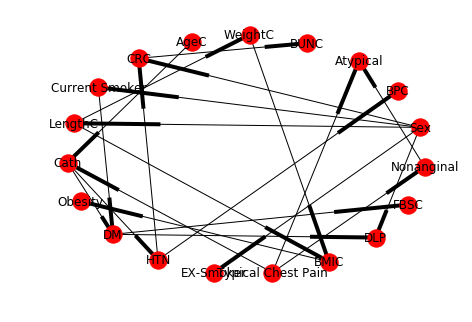

In [92]:
nx.draw(model1, with_labels=True)

In [18]:
from pgmpy.estimators import ParameterEstimator
pe = ParameterEstimator(model1, df_col3)
print("\n", pe.state_counts('Cath'))


 AgeC                 0        1        2    
Typical Chest Pain   0   1    0    1   0   1
Cath                                        
0                   66   6  109    4   3   1
1                   12  25   34  104  16  25


In [19]:
from pgmpy.estimators import MaximumLikelihoodEstimator
mle = MaximumLikelihoodEstimator(model1, df_col3)
print(mle.estimate_cpd('AgeC'))
print(mle.estimate_cpd('Cath'))

+---------+----------+
| AgeC(0) | 0.269136 |
+---------+----------+
| AgeC(1) | 0.619753 |
+---------+----------+
| AgeC(2) | 0.111111 |
+---------+----------+
+--------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
| AgeC               | AgeC(0)               | AgeC(0)               | AgeC(1)               | AgeC(1)               | AgeC(2)               | AgeC(2)               |
+--------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
| Typical Chest Pain | Typical Chest Pain(0) | Typical Chest Pain(1) | Typical Chest Pain(0) | Typical Chest Pain(1) | Typical Chest Pain(0) | Typical Chest Pain(1) |
+--------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
| Ca

In [20]:
model1.fit(df_col3, estimator=MaximumLikelihoodEstimator) # default␣, →equivalent_sample_ 
for cpd in model1.get_cpds(): 
    print(cpd)

+---------+----------+
| AgeC(0) | 0.269136 |
+---------+----------+
| AgeC(1) | 0.619753 |
+---------+----------+
| AgeC(2) | 0.111111 |
+---------+----------+
+--------------------+-----------------------+-----------------------+-----------------------+-----------------------+
| Nonanginal         | Nonanginal(0)         | Nonanginal(0)         | Nonanginal(1)         | Nonanginal(1)         |
+--------------------+-----------------------+-----------------------+-----------------------+-----------------------+
| Typical Chest Pain | Typical Chest Pain(0) | Typical Chest Pain(1) | Typical Chest Pain(0) | Typical Chest Pain(1) |
+--------------------+-----------------------+-----------------------+-----------------------+-----------------------+
| Atypical(0)        | 0.41517857142857145   | 1.0                   | 1.0                   | 0.5                   |
+--------------------+-----------------------+-----------------------+-----------------------+-----------------------+
| Atyp

In [21]:
from pgmpy.inference import VariableElimination
model1.fit(df_col3, estimator=MaximumLikelihoodEstimator)
inference = VariableElimination(model1)

In [22]:
from pgmpy.inference import VariableElimination
model1.fit(df_col3, estimator=MaximumLikelihoodEstimator)
inference = VariableElimination(model1)

In [23]:
print(query['Cath'])

NameError: name 'query' is not defined

In [24]:
m = inference.induced_graph(['Cath','Sex','Obesity','AgeC','BMIC','DM','FBSC','Typical Chest Pain','WeightC','LengthC','Current Smoker','EX-Smoker','DLP','Atypical','Nonanginal','CRC','BPC','HTN','BUNC'])

C:\Users\Aashna Joshi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Aashna Joshi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Aashna Joshi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Aashna Joshi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
C:\Users\Aashna Joshi\Anaconda3\lib\

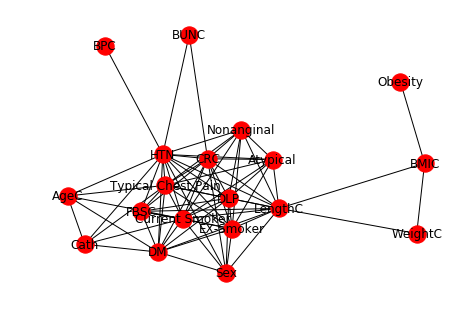

In [25]:
nx.draw(m, with_labels = True)

In [26]:
cat_columns = df_col3.select_dtypes(['category']).columns


In [93]:
model1 = BayesianModel([('AgeC','Cath'),('Sex','Current Smoker'),('Current Smoker','DM'),('Cath','DM'),('Sex','EX-Smoker'),
                        ('Sex','LengthC'),('LengthC','WeightC'),('LengthC','BMIC'),('Typical Chest Pain','Cath'),('Typical Chest Pain','Atypical'),
                        ('Typical Chest Pain','Nonanginal'),('Nonanginal','Atypical'),('WeightC','BMIC'),('BMIC','Obesity'),('Sex','DLP'),('DM','DLP'),
                       ('DM','FBSC'),('Cath','HTN'),('HTN','CRC'),('Sex','CRC'),('HTN','BPC'),('CRC','BUNC')])
Df_col3 = df_col3.copy()
model1.fit(Df_col3)
Df_col3.drop('Cath', axis=1, inplace=True)
y_prob = model1.predict_probability(Df_col3)
y_prob
#y_prob.iloc[91,:]

,Cath_0,Cath_1
0,0.922863,0.077137
1,0.024935,0.975065
2,0.002635,0.997365
3,0.953543,0.046457
4,0.894593,0.105407
...,...,...
400,0.137612,0.862388
401,0.922863,0.077137
402,0.024935,0.975065
403,0.017817,0.982183


In [28]:
y = df_col3.drop(['Sex','Obesity','AgeC','BMIC','DM','FBSC','Typical Chest Pain','LengthC','WeightC','Current Smoker','EX-Smoker','DLP','Atypical','Nonanginal','CRC','BPC','HTN','BUNC'],axis=1)

In [29]:
x = df_col3.drop(['Cath'],axis=1)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.82,random_state=23)

In [32]:
print(x_train)

     Atypical  Sex  Obesity  DM  Typical Chest Pain  Current Smoker  \
289         0    1        1   0                   0               0   
383         1    1        1   0                   0               0   
203         0    0        0   0                   1               1   
151         0    1        1   1                   1               0   
239         0    0        1   0                   1               0   
..        ...  ...      ...  ..                 ...             ...   
237         1    1        1   1                   0               0   
31          0    0        0   0                   1               1   
40          1    1        1   1                   0               0   
230         1    0        1   0                   0               0   
83          0    0        1   0                   1               1   

     EX-Smoker  DLP  Nonanginal  HTN AgeC BMIC FBSC WeightC LengthC CRC BPC  \
289          0    0           0    0    1    2    0       1       1 

In [33]:
print(x_test)

     Atypical  Sex  Obesity  DM  Typical Chest Pain  Current Smoker  \
332         0    1        1   0                   0               0   
217         0    0        1   0                   1               0   
400         0    1        1   0                   1               0   
280         1    0        1   0                   0               0   
108         0    0        0   0                   1               0   
..        ...  ...      ...  ..                 ...             ...   
307         1    1        1   0                   0               0   
27          0    1        1   1                   1               0   
364         1    1        1   1                   0               0   
158         0    1        1   0                   1               0   
328         1    1        1   0                   0               0   

     EX-Smoker  DLP  Nonanginal  HTN AgeC BMIC FBSC WeightC LengthC CRC BPC  \
332          0    0           0    0    1    1    0       0       0 

In [34]:
data_train = pd.concat([x_train,y_train], axis=1)

In [35]:
model1.fit(data_train, estimator=MaximumLikelihoodEstimator)

In [36]:
learn = MaximumLikelihoodEstimator(model1,df_col3)
learn.get_parameters()

[<TabularCPD representing P(AgeC:3) at 0x267880ed9b0>,
 <TabularCPD representing P(Atypical:2 | Nonanginal:2, Typical Chest Pain:2) at 0x26782a5b668>,
 <TabularCPD representing P(BMIC:3 | LengthC:3, WeightC:3) at 0x26788774cf8>,
 <TabularCPD representing P(BPC:3 | HTN:2) at 0x26782a5bb70>,
 <TabularCPD representing P(BUNC:3 | CRC:3) at 0x26788774898>,
 <TabularCPD representing P(CRC:3 | HTN:2, Sex:2) at 0x2678877cf98>,
 <TabularCPD representing P(Cath:2 | AgeC:3, Typical Chest Pain:2) at 0x2678877c2e8>,
 <TabularCPD representing P(Current Smoker:2 | Sex:2) at 0x2678877c668>,
 <TabularCPD representing P(DLP:2 | DM:2, Sex:2) at 0x2678877ce80>,
 <TabularCPD representing P(DM:2 | Cath:2, Current Smoker:2) at 0x2678877c358>,
 <TabularCPD representing P(EX-Smoker:2 | Sex:2) at 0x267887814e0>,
 <TabularCPD representing P(FBSC:3 | DM:2) at 0x267887811d0>,
 <TabularCPD representing P(HTN:2 | Cath:2) at 0x26788781860>,
 <TabularCPD representing P(LengthC:3 | Sex:2) at 0x26788781d30>,
 <TabularCP

In [37]:
Cath_predict_values = model1.predict(x_test)

100%|██████████| 71/71 [00:04<00:00, 14.92it/s]


In [38]:
Cath_predict_values_array = Cath_predict_values.Cath.values
y_test_array = y_test.Cath.values

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix 

In [40]:
confusion_matrix(y_test_array, Cath_predict_values_array)

array([[28,  3],
       [ 4, 38]], dtype=int64)

In [41]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [43]:
print('accuracy %s' %metrics.accuracy_score(y_test_array,Cath_predict_values_array))
print('Recall %s' %metrics.recall_score(y_test_array,Cath_predict_values_array))

accuracy 0.9041095890410958
Recall 0.9047619047619048


In [44]:
 print(classification_report(y_test_array, Cath_predict_values_array))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        31
           1       0.93      0.90      0.92        42

    accuracy                           0.90        73
   macro avg       0.90      0.90      0.90        73
weighted avg       0.90      0.90      0.90        73



In [45]:
yy_prob = model1.predict_probability(x_test)
print(yy_prob)
print(type(yy_prob))
print(list(yy_prob.index.values))

       Cath_0    Cath_1
332  0.916266  0.083734
217  0.120598  0.879402
400  0.155318  0.844682
280  0.953104  0.046896
108  0.027511  0.972489
..        ...       ...
307  0.916266  0.083734
27   0.002676  0.997324
364  0.176368  0.823632
158  0.033839  0.966161
328  0.916266  0.083734

[73 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
[332, 217, 400, 280, 108, 139, 274, 195, 272, 174, 168, 201, 123, 69, 14, 238, 88, 222, 348, 110, 94, 268, 389, 326, 298, 91, 190, 281, 302, 145, 251, 18, 320, 362, 34, 369, 38, 82, 308, 63, 66, 327, 270, 50, 107, 59, 26, 207, 161, 373, 275, 216, 112, 182, 122, 213, 117, 233, 179, 140, 292, 2, 13, 323, 73, 304, 388, 95, 307, 27, 364, 158, 328]


In [46]:
yyy = (yy_prob>=0.30)
print(yyy)

     Cath_0  Cath_1
332    True   False
217   False    True
400   False    True
280    True   False
108   False    True
..      ...     ...
307    True   False
27    False    True
364   False    True
158   False    True
328    True   False

[73 rows x 2 columns]


In [47]:
new = yyy["Cath_1"] != False
print(new)
print(type(new))

332    False
217     True
400     True
280    False
108     True
       ...  
307    False
27      True
364     True
158     True
328    False
Name: Cath_1, Length: 73, dtype: bool
<class 'pandas.core.series.Series'>


In [48]:
trueVal = list()
for val in new.iteritems():
    if(val[1]==True): 
        trueVal.append(val[0])
print(trueVal)
print(len(trueVal))

[217, 400, 108, 195, 174, 168, 201, 123, 69, 14, 238, 222, 110, 94, 389, 190, 302, 145, 18, 362, 34, 369, 38, 82, 63, 66, 50, 107, 59, 26, 207, 161, 373, 216, 112, 182, 213, 117, 140, 2, 13, 73, 304, 388, 95, 27, 364, 158]
48


In [49]:
#print(data2.head(10))
data3 = pd.read_csv("F:/ME/Sem 3/demo6.csv") 
print(data3)

     Atypical  Age  Sex  Obesity        BMI  DM  FBS  Typical Chest Pain  \
0           0   53    0        1  29.387755   0   90                   0   
1           0   67    1        1  28.398718   0   80                   1   
2           0   54    0        0  20.077335   0   85                   1   
3           0   66    1        1  26.838648   0   78                   0   
4           0   50    1        1  37.165193   0  104                   0   
..        ...  ...  ...      ...        ...  ..  ...                 ...   
298         0   58    0        1  29.761905   0   92                   1   
299         1   55    1        1  27.700831   0   86                   0   
300         0   48    1        1  30.078125   0   83                   0   
301         1   57    1        1  35.599858   1   96                   0   
302         0   56    1        1  29.411765   0   78                   1   

     Weight  Length  ...  Nonanginal  HTN   BP  Q Wave  St Elevation  \
0        90    

In [50]:
from sklearn.model_selection import train_test_split
x=data3.iloc[:,:-1]
y=data3.iloc[:,-1]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.82,random_state=23)

In [52]:
def resamplingDataPrep(X_train, y_train, target_var): 
    # concatenate our training data back together
    resampling = X_train.copy()
    resampling[target_var] = y_train.values
    # separate minority and majority classes
    majority_class = resampling[resampling[target_var]==0]
    minority_class = resampling[resampling[target_var]==1]
    # Get a class count to understand the class imbalance.
    print('majority_class: '+ str(len(majority_class)))
    print('minority_class: '+ str(len(minority_class)))
    return majority_class, minority_class

In [53]:
def upsample_SMOTE(X_train, y_train, ratio=1.0):
    """Upsamples minority class using SMOTE.
    Ratio argument is the percentage of the upsampled minority class in relation
    to the majority class. Default is 1.0
    """
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    print(len(X_train_sm), len(y_train_sm))
    return X_train_sm, y_train_sm

In [54]:
resamplingDataPrep(x_train, y_train, 'Cath')

majority_class: 73
minority_class: 175


(     Atypical  Age  Sex  Obesity        BMI  DM  FBS  Typical Chest Pain  \
 296         1   42    0        0  23.711845   0  202                   0   
 64          0   55    0        1  29.411765   0   90                   0   
 193         1   64    1        1  31.611773   1  300                   0   
 8           0   58    1        1  31.615793   0   69                   0   
 16          0   41    0        0  23.808690   0   65                   0   
 ..        ...  ...  ...      ...        ...  ..  ...                 ...   
 48          0   53    1        1  25.721032   0   84                   0   
 293         1   59    0        1  31.248764   0   90                   0   
 192         1   54    0        0  24.910767   0   94                   0   
 194         1   46    1        1  28.515625   0   94                   0   
 153         1   63    1        1  25.000000   1  156                   0   
 
      Weight  Length  ...  Nonanginal  HTN   BP  Q Wave  St Elevation  \
 

In [55]:
xx, yy = upsample_SMOTE(x_train,y_train)

350 350


In [56]:
print(xx)
print(yy)
print(type(xx))
print(type(yy))

     Atypical  Age  Sex  Obesity        BMI  DM  FBS  Typical Chest Pain  \
0           1   62    0        1  32.283058   0   90                   0   
1           0   56    1        0  21.093750   0   97                   1   
2           0   65    1        1  32.000000   1  227                   1   
3           1   42    0        0  23.711845   0  202                   0   
4           0   55    0        1  29.411765   0   90                   0   
..        ...  ...  ...      ...        ...  ..  ...                 ...   
345         0   64    0        1  31.227103   0   92                   0   
346         0   55    0        0  24.864239   0   78                   0   
347         0   50    0        0  25.135547   0   88                   0   
348         1   48    1        0  26.354425   0   94                   0   
349         0   41    0        0  32.452126   0   90                   0   

     Weight  Length  ...  BUN  Nonanginal  HTN   BP  Q Wave  St Elevation  \
0       10

In [57]:
ef_col = pd.concat([xx,yy], axis=1)

In [58]:
print(ef_col)

     Atypical  Age  Sex  Obesity        BMI  DM  FBS  Typical Chest Pain  \
0           1   62    0        1  32.283058   0   90                   0   
1           0   56    1        0  21.093750   0   97                   1   
2           0   65    1        1  32.000000   1  227                   1   
3           1   42    0        0  23.711845   0  202                   0   
4           0   55    0        1  29.411765   0   90                   0   
..        ...  ...  ...      ...        ...  ..  ...                 ...   
345         0   64    0        1  31.227103   0   92                   0   
346         0   55    0        0  24.864239   0   78                   0   
347         0   50    0        0  25.135547   0   88                   0   
348         1   48    1        0  26.354425   0   94                   0   
349         0   41    0        0  32.452126   0   90                   0   

     Weight  Length  ...  Nonanginal  HTN   BP  Q Wave  St Elevation  \
0       100    

In [59]:
ef_col2 = pd.concat([x_test,y_test], axis=1)
print(ef_col2)
print(len(ef_col2))

     Atypical  Age  Sex  Obesity        BMI  DM  FBS  Typical Chest Pain  \
231         0   64    0        0  24.897060   1  219                   1   
46          0   57    1        1  30.863007   0  106                   1   
2           0   54    0        0  20.077335   0   85                   1   
272         0   76    0        0  22.308150   0   96                   0   
243         0   72    1        1  26.222685   0   89                   1   
82          1   86    0        0  24.386526   1  270                   0   
63          0   68    1        1  34.808750   1   96                   0   
38          0   76    0        0  21.077195   1  230                   0   
274         0   55    1        1  31.555556   1  256                   1   
285         1   56    1        0  24.034610   0  104                   0   
74          0   60    1        1  25.558846   1  191                   1   
240         0   67    0        0  21.138856   1   94                   1   
220         

In [60]:
ef_col3 = pd.concat([ef_col,ef_col2],ignore_index=True)
print(ef_col3)
print(len(ef_col3))
print(ef_col3.head(20))

     Atypical  Age  Sex  Obesity        BMI  DM  FBS  Typical Chest Pain  \
0           1   62    0        1  32.283058   0   90                   0   
1           0   56    1        0  21.093750   0   97                   1   
2           0   65    1        1  32.000000   1  227                   1   
3           1   42    0        0  23.711845   0  202                   0   
4           0   55    0        1  29.411765   0   90                   0   
..        ...  ...  ...      ...        ...  ..  ...                 ...   
400         0   49    1        1  25.402816   0  103                   1   
401         1   52    0        1  28.228386   0   84                   0   
402         0   57    1        1  31.887755   0  114                   1   
403         0   59    0        1  26.573129   0  111                   1   
404         0   80    1        0  23.283419   0   94                   1   

     Weight  Length  ...  Nonanginal  HTN   BP  Q Wave  St Elevation  \
0       100    

In [61]:
x=ef_col3.iloc[:,:-1]
y=ef_col3.iloc[:,-1]
#x = data2.drop(['Cath'],axis=1)
#y = data2.drop(['Sex','Obesity','AgeC','BMIC','DM','FBSC','Typical Chest Pain','LengthC','WeightC','Current Smoker','EX-Smoker','DLP','Atypical','Nonanginal','CRC','BPC','HTN','BUNC','Q Wave','St Elevation','St Depression','Tinversion','LVH','Poor R Progression','BBB'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.82,random_state=23)

In [62]:
print(y_test)

332    0
217    1
400    1
280    0
108    1
      ..
307    0
27     1
364    1
158    1
328    0
Name: Cath, Length: 73, dtype: int64


In [63]:
rowFinal3 = x_test.loc[ trueVal , : ]
rowFinal4 = y_test.loc[ trueVal , ]
print(len(trueVal))
print(rowFinal3)
print(rowFinal4)

48
     Atypical  Age  Sex  Obesity        BMI  DM  FBS  Typical Chest Pain  \
217         0   65    0        1  27.513385   0   90                   1   
400         0   49    1        1  25.402816   0  103                   1   
108         0   70    0        0  19.031142   0   78                   1   
195         1   43    1        1  37.370242   1  210                   0   
174         0   55    0        1  30.739417   0  125                   1   
168         0   69    1        0  24.671053   0  100                   1   
201         0   54    0        0  24.677021   0   90                   1   
123         0   53    1        1  30.832894   1   89                   1   
69          0   55    0        0  18.365473   0   89                   1   
14          1   70    1        1  28.444444   0  102                   0   
238         1   70    1        1  30.700408   1  170                   0   
222         0   66    0        0  18.115413   0   76                   1   
110      

In [64]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.82,random_state=23)
xg_cl=xgb.XGBClassifier(objective='binary:logistic',seed=8)

In [65]:
xg_cl.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=8,
              silent=None, subsample=1, verbosity=1)

In [66]:
xg_cl.score(rowFinal3,rowFinal4)

0.9375

In [67]:
l = xg_cl.predict(rowFinal3)
print(l)
print(len(rowFinal3))

[1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 1 1 1]
48


In [68]:
trueVal3 = list()
for val in new.iteritems():
    if(val[1]==False): 
        trueVal3.append(val[0])

In [69]:
print(trueVal3)
print(len(trueVal3))

[332, 280, 139, 274, 272, 88, 348, 268, 326, 298, 91, 281, 251, 320, 308, 327, 270, 275, 122, 233, 179, 292, 323, 307, 328]
25


In [70]:
print(y_test[trueVal3])

332    0
280    0
139    0
274    0
272    0
88     0
348    0
268    0
326    0
298    0
91     1
281    0
251    0
320    0
308    0
327    0
270    0
275    0
122    0
233    0
179    0
292    0
323    0
307    0
328    0
Name: Cath, dtype: int64


In [71]:
print(l)
print(type(l))
print(len(l))

[1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 1 1 1]
<class 'numpy.ndarray'>
48


In [72]:
s = pd.Series(l, rowFinal3.index.values) 
s.name = 'Cath'

In [73]:
print(s)
print(len(s))

217    1
400    1
108    1
195    0
174    1
168    1
201    1
123    1
69     1
14     0
238    1
222    1
110    1
94     1
389    1
190    1
302    0
145    1
18     1
362    1
34     1
369    1
38     1
82     1
63     1
66     1
50     1
107    1
59     1
26     1
207    1
161    1
373    1
216    0
112    1
182    1
213    1
117    1
140    0
2      1
13     1
73     1
304    0
388    1
95     1
27     1
364    1
158    1
Name: Cath, dtype: int64
48


In [74]:
s_frame = s.to_frame()
rowFinal4_frame = rowFinal4.to_frame()
#print(y_test_frame)
print(s_frame)
#print(type(y_test_frame))
#print(type(s_frame))
#print(len(y_test_frame))
print(len(s_frame))
print(rowFinal4)
print(len(rowFinal4))


     Cath
217     1
400     1
108     1
195     0
174     1
168     1
201     1
123     1
69      1
14      0
238     1
222     1
110     1
94      1
389     1
190     1
302     0
145     1
18      1
362     1
34      1
369     1
38      1
82      1
63      1
66      1
50      1
107     1
59      1
26      1
207     1
161     1
373     1
216     0
112     1
182     1
213     1
117     1
140     0
2       1
13      1
73      1
304     0
388     1
95      1
27      1
364     1
158     1
48
217    1
400    1
108    1
195    0
174    1
168    1
201    1
123    1
69     1
14     1
238    1
222    0
110    1
94     1
389    1
190    0
302    0
145    1
18     1
362    1
34     1
369    1
38     1
82     1
63     1
66     1
50     1
107    1
59     1
26     1
207    1
161    1
373    1
216    0
112    1
182    1
213    1
117    1
140    0
2      1
13     1
73     1
304    0
388    1
95     1
27     1
364    1
158    1
Name: Cath, dtype: int64
48


In [75]:
s_frame['ValMatch?'] = np.where(rowFinal4_frame['Cath'] == s_frame['Cath'], True, False)
print(s_frame)

     Cath  ValMatch?
217     1       True
400     1       True
108     1       True
195     0       True
174     1       True
168     1       True
201     1       True
123     1       True
69      1       True
14      0      False
238     1       True
222     1      False
110     1       True
94      1       True
389     1       True
190     1      False
302     0       True
145     1       True
18      1       True
362     1       True
34      1       True
369     1       True
38      1       True
82      1       True
63      1       True
66      1       True
50      1       True
107     1       True
59      1       True
26      1       True
207     1       True
161     1       True
373     1       True
216     0       True
112     1       True
182     1       True
213     1       True
117     1       True
140     0       True
2       1       True
13      1       True
73      1       True
304     0       True
388     1       True
95      1       True
27      1       True
364     1    

In [76]:
for ind in s_frame.index:
    if(s_frame['ValMatch?'][ind].all()==False):
        #print(Cath_predict_values.index)
        print(ind)
    

14
222
190


In [77]:
for ind in s_frame.index:
    if(s_frame['ValMatch?'][ind].all()==False and s_frame['Cath'][ind].all()==1 ):
        print(ind)

222
190


In [78]:
for ind in s_frame.index:
    if(s_frame['ValMatch?'][ind].all()==False and s_frame['Cath'][ind].all()==0 ):
        print(ind)

14


In [80]:
print(rowFinal4)
print(type(rowFinal4))

217    1
400    1
108    1
195    0
174    1
168    1
201    1
123    1
69     1
14     1
238    1
222    0
110    1
94     1
389    1
190    0
302    0
145    1
18     1
362    1
34     1
369    1
38     1
82     1
63     1
66     1
50     1
107    1
59     1
26     1
207    1
161    1
373    1
216    0
112    1
182    1
213    1
117    1
140    0
2      1
13     1
73     1
304    0
388    1
95     1
27     1
364    1
158    1
Name: Cath, dtype: int64
<class 'pandas.core.series.Series'>


In [86]:
rowFinal4_array = rowFinal4.to_numpy()
print(rowFinal4_array)
print(type(rowFinal4_array))

[1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 1 1 1]
<class 'numpy.ndarray'>


In [87]:
print(l)
print(type(l))

[1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 1 1 1]
<class 'numpy.ndarray'>


In [90]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
print("Precision = {}".format(precision_score(rowFinal4_array, l, average='macro')))
print("Recall = {}".format(recall_score(rowFinal4_array, l, average='macro')))
print("Accuracy = {}".format(accuracy_score(rowFinal4_array, l)))

Precision = 0.8928571428571428
Recall = 0.8449477351916377
Accuracy = 0.9375


In [91]:
print(classification_report(rowFinal4_array, l))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.95      0.98      0.96        41

    accuracy                           0.94        48
   macro avg       0.89      0.84      0.87        48
weighted avg       0.94      0.94      0.94        48

